In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_original = pd.read_csv('idf_train.csv')
test_original = pd.read_csv('idf_test.csv')

In [3]:
train = train_original.copy()
test = test_original.copy()

In [4]:
train.shape

(3235, 306)

In [5]:
test.shape

(1387, 305)

In [6]:
train.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class,0,1,2,3,...,290,291,292,293,294,295,296,297,298,299
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0,0.013272,-0.046192,0.013292,0.057042,...,-0.000690,0.042961,-0.115856,-0.051092,-0.113489,0.010326,-0.013493,0.005096,0.088509,-0.049765
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0,-0.034284,0.046894,0.019561,0.142132,...,-0.043659,0.023384,-0.060533,0.000434,0.015738,-0.021155,-0.023114,-0.048888,0.021127,0.003741
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1,0.001154,0.025893,-0.025144,0.060305,...,-0.027087,0.052895,-0.076283,-0.015105,-0.030569,-0.078503,0.005025,-0.005411,0.071961,0.010955
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0,0.000701,0.088502,-0.039560,-0.001807,...,-0.034683,-0.187994,-0.044528,-0.031775,0.078682,0.051348,-0.107455,0.080033,0.065011,-0.089328
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1,0.019057,0.016400,0.024815,0.129743,...,0.038360,0.059489,-0.133066,-0.033280,-0.084382,-0.103801,-0.031252,-0.099720,-0.017788,-0.037329


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Columns: 306 entries, id to 299
dtypes: float64(301), int64(1), object(4)
memory usage: 7.6+ MB


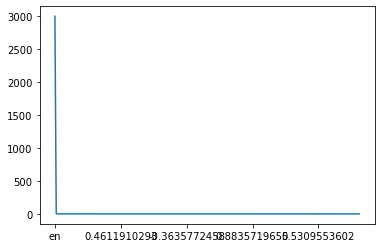

In [8]:
train['lang'].value_counts().plot()

In [9]:
train.describe()

,id,sentiment_class,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,3.235000e+03,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,...,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000
mean,1.245344e+18,-0.001236,-0.004318,0.006682,0.011623,0.097492,-0.028435,0.021812,0.051763,-0.098316,...,-0.013532,0.057583,-0.104009,-0.041700,-0.049612,-0.052972,-0.026438,-0.040948,0.004476,0.000016
std,8.014866e+14,0.688719,0.052514,0.050829,0.047568,0.053890,0.052307,0.050644,0.053786,0.049935,...,0.056190,0.054134,0.052068,0.062992,0.054572,0.057400,0.053479,0.053797,0.055596,0.055521
min,1.243909e+18,-1.000000,-0.360959,-0.274928,-0.234864,-0.139570,-0.438786,-0.317126,-0.195021,-0.363498,...,-0.224361,-0.188263,-0.368985,-0.306793,-0.313231,-0.379341,-0.330835,-0.301864,-0.340515,-0.279418
25%,1.244672e+18,0.000000,-0.036239,-0.023919,-0.013638,0.064367,-0.061147,-0.009522,0.017418,-0.128433,...,-0.049165,0.024286,-0.135025,-0.078919,-0.082369,-0.087749,-0.059951,-0.074519,-0.027846,-0.035614
50%,1.245406e+18,0.000000,-0.001287,0.006019,0.013537,0.097904,-0.029953,0.022160,0.051574,-0.098063,...,-0.016128,0.058703,-0.102559,-0.037257,-0.051245,-0.050825,-0.027218,-0.041384,0.006143,-0.003311
75%,1.246039e+18,0.000000,0.029474,0.036340,0.039382,0.129501,0.002380,0.051894,0.086451,-0.067129,...,0.020579,0.091907,-0.071953,-0.001298,-0.019042,-0.016189,0.005393,-0.008046,0.038891,0.031625
max,1.246734e+18,1.000000,0.206743,0.245278,0.283178,0.372913,0.254761,0.297879,0.278156,0.119795,...,0.238399,0.384513,0.119715,0.239870,0.288396,0.305322,0.200659,0.224527,0.506988,0.364035


In [10]:
train['lang'].value_counts()

en                            2994
 pink Peruvian opal! via         4
 Find More                       2
&gt                              2
WORLDS OKAYEST MOTHER! &lt       2
                              ... 
 ️                               1
 very much loved🥰️ …             1
-0.4265306098                    1
 Find More | ONLINE STORE:       1
0.1486563363                     1
Name: lang, Length: 232, dtype: int64

In [11]:
train[train['lang'] == '0.6890497729']

,id,original_text,lang,retweet_count,original_author,sentiment_class,0,1,2,3,...,290,291,292,293,294,295,296,297,298,299
3048,1.244330e+18,Happy Mothers day to all the mothers... step-m...,0.6890497729,1,0,0,-0.028499,-0.056887,0.010866,0.054213,...,-0.104976,0.080895,-0.169776,-0.139106,-0.122357,-0.075476,-0.045038,0.072879,0.003655,-0.064153


In [12]:
train[train['lang'] == 'WORLDS OKAYEST MOTHER! &lt']

,id,original_text,lang,retweet_count,original_author,sentiment_class,0,1,2,3,...,290,291,292,293,294,295,296,297,298,299
1201,1.244167e+18,#MothersDay is it only me or whenever it's Mot...,WORLDS OKAYEST MOTHER! &lt,Shop &lt,|&gt,0,0.001116,-0.024236,0.058163,0.041192,...,-0.020313,-0.009527,-0.123330,-0.022155,-0.023748,0.003373,-0.128735,-0.100928,0.101107,0.057447
2431,1.245463e+18,"To all mothers, you're loved... You're cherish...",WORLDS OKAYEST MOTHER! &lt,Shop &lt,|&gt,0,-0.025926,0.050393,0.045233,0.216913,...,-0.032461,0.050306,-0.071283,-0.091280,-0.204969,-0.230015,-0.117392,-0.088088,0.042137,0.093993


In [13]:
##### since all the tweets are in english language hence language is not having any impact on the sentiment_class so we would drop it

In [14]:
train.isnull().sum()

id                 0
original_text      0
lang               4
retweet_count      4
original_author    0
                  ..
295                0
296                0
297                0
298                0
299                0
Length: 306, dtype: int64

In [15]:
#train = train[train['lang'] == 'en']

In [16]:
train.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class,0,1,2,3,...,290,291,292,293,294,295,296,297,298,299
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0,0.013272,-0.046192,0.013292,0.057042,...,-0.000690,0.042961,-0.115856,-0.051092,-0.113489,0.010326,-0.013493,0.005096,0.088509,-0.049765
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0,-0.034284,0.046894,0.019561,0.142132,...,-0.043659,0.023384,-0.060533,0.000434,0.015738,-0.021155,-0.023114,-0.048888,0.021127,0.003741
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1,0.001154,0.025893,-0.025144,0.060305,...,-0.027087,0.052895,-0.076283,-0.015105,-0.030569,-0.078503,0.005025,-0.005411,0.071961,0.010955
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0,0.000701,0.088502,-0.039560,-0.001807,...,-0.034683,-0.187994,-0.044528,-0.031775,0.078682,0.051348,-0.107455,0.080033,0.065011,-0.089328
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1,0.019057,0.016400,0.024815,0.129743,...,0.038360,0.059489,-0.133066,-0.033280,-0.084382,-0.103801,-0.031252,-0.099720,-0.017788,-0.037329


In [17]:
#test = test[test['lang'] == 'en']

In [18]:
train.isnull().sum()

id                 0
original_text      0
lang               4
retweet_count      4
original_author    0
                  ..
295                0
296                0
297                0
298                0
299                0
Length: 306, dtype: int64

In [19]:
test.isnull().sum()

id                 0
original_text      0
lang               0
retweet_count      1
original_author    0
                  ..
295                0
296                0
297                0
298                0
299                0
Length: 305, dtype: int64

In [20]:
train.drop(['id','lang'],axis = 1,inplace = True)

In [21]:
train.head()

,original_text,retweet_count,original_author,sentiment_class,0,1,2,3,4,5,...,290,291,292,293,294,295,296,297,298,299
0,Happy #MothersDay to all you amazing mothers o...,0,BeenXXPired,0,0.013272,-0.046192,0.013292,0.057042,-0.120218,0.063735,...,-0.000690,0.042961,-0.115856,-0.051092,-0.113489,0.010326,-0.013493,0.005096,0.088509,-0.049765
1,Happy Mothers Day Mum - I'm sorry I can't be t...,1,FestiveFeeling,0,-0.034284,0.046894,0.019561,0.142132,-0.053285,-0.071884,...,-0.043659,0.023384,-0.060533,0.000434,0.015738,-0.021155,-0.023114,-0.048888,0.021127,0.003741
2,Happy mothers day To all This doing a mothers ...,0,KrisAllenSak,-1,0.001154,0.025893,-0.025144,0.060305,-0.077366,0.011482,...,-0.027087,0.052895,-0.076283,-0.015105,-0.030569,-0.078503,0.005025,-0.005411,0.071961,0.010955
3,Happy mothers day to this beautiful woman...ro...,0,Queenuchee,0,0.000701,0.088502,-0.039560,-0.001807,0.001125,0.077518,...,-0.034683,-0.187994,-0.044528,-0.031775,0.078682,0.051348,-0.107455,0.080033,0.065011,-0.089328
4,Remembering the 3 most amazing ladies who made...,0,brittan17446794,-1,0.019057,0.016400,0.024815,0.129743,-0.016523,-0.005523,...,0.038360,0.059489,-0.133066,-0.033280,-0.084382,-0.103801,-0.031252,-0.099720,-0.017788,-0.037329


In [22]:
ID = test['id']

In [23]:
test.drop(['id','lang'],axis = 1,inplace = True)

In [24]:
test.head()

,original_text,retweet_count,original_author,0,1,2,3,4,5,6,...,290,291,292,293,294,295,296,297,298,299
0,"3. Yeah, I once cooked potatoes when I was 3 y...",0,LToddWood,-0.002245,0.062777,-0.019745,0.169383,0.012063,-0.001394,0.013303,...,-0.015462,0.058636,-0.148357,0.027945,0.011987,-0.105070,-0.047126,0.022804,0.023428,0.026101
1,"Happy Mother's Day to all the mums, step-mums,...",0,iiarushii,-0.008745,-0.047719,-0.007001,-0.009984,-0.045148,0.048713,0.062498,...,-0.103861,0.072769,-0.158898,-0.165933,-0.118075,-0.076602,-0.006675,0.117657,-0.016197,-0.043918
2,"I love the people from the UK, however, when I...",0,andreaanderegg,0.021935,0.000537,0.026372,0.152518,-0.057579,-0.025256,0.040798,...,-0.044968,0.060104,-0.067946,-0.008333,-0.042501,-0.065369,-0.001961,-0.029302,-0.003403,-0.000354
3,Happy 81st Birthday Happy Mother’s Day to my m...,1,TheBookTweeters,-0.030484,0.009033,0.039192,0.120464,-0.062500,-0.005657,0.032580,...,0.044067,0.108616,-0.091914,0.012367,-0.065740,-0.038398,-0.006482,-0.054136,-0.071080,0.030214
4,Happy Mothers day to all those wonderful mothe...,0,andreaanderegg,0.039375,-0.026593,0.034651,0.128547,-0.016521,0.026583,0.091108,...,-0.036681,0.037878,-0.181073,-0.031629,-0.061148,-0.102035,-0.050805,-0.036700,0.039077,-0.003796


In [25]:
train.original_author.value_counts()

LToddWood          369
0                  146
MoM_Mastering       99
andreaanderegg      86
LiveGoodProduct     71
                  ... 
stvnwlsn_clt         1
ohioishome           1
rsen5                1
KrisnaWrites         1
TheBLOB2016          1
Name: original_author, Length: 1574, dtype: int64

In [26]:
train.fillna('0',inplace = True)
test.fillna('0',inplace = True)

In [27]:
train.isnull().sum()

original_text      0
retweet_count      0
original_author    0
sentiment_class    0
0                  0
                  ..
295                0
296                0
297                0
298                0
299                0
Length: 304, dtype: int64

In [43]:
import re
def select_number(sentence):
    #if re.search(r'\d+', sentence).group(0) == "Nana"
    return int(re.search(r'\d+', sentence).group(0))

retweet_count_cleaned = []
for value in train['retweet_count']:
    try:
        digit = select_number(value)
        retweet_count_cleaned.append(digit)
    except:
        retweet_count_cleaned.append(0)

In [44]:
train['retweet_count'] = retweet_count_cleaned

In [45]:
retweet_count_cleaned = []
for value in test['retweet_count']:
    try:
        digit = select_number(value)
        retweet_count_cleaned.append(digit)
    except:
        retweet_count_cleaned.append(0)
    
test['retweet_count'] = retweet_count_cleaned

In [46]:
train.head()

,original_text,retweet_count,original_author,sentiment_class,0,1,2,3,4,5,...,290,291,292,293,294,295,296,297,298,299
0,Happy #MothersDay to all you amazing mothers o...,0,158,0,0.013272,-0.046192,0.013292,0.057042,-0.120218,0.063735,...,-0.000690,0.042961,-0.115856,-0.051092,-0.113489,0.010326,-0.013493,0.005096,0.088509,-0.049765
1,Happy Mothers Day Mum - I'm sorry I can't be t...,0,336,0,-0.034284,0.046894,0.019561,0.142132,-0.053285,-0.071884,...,-0.043659,0.023384,-0.060533,0.000434,0.015738,-0.021155,-0.023114,-0.048888,0.021127,0.003741
2,Happy mothers day To all This doing a mothers ...,0,485,-1,0.001154,0.025893,-0.025144,0.060305,-0.077366,0.011482,...,-0.027087,0.052895,-0.076283,-0.015105,-0.030569,-0.078503,0.005025,-0.005411,0.071961,0.010955
3,Happy mothers day to this beautiful woman...ro...,0,718,0,0.000701,0.088502,-0.039560,-0.001807,0.001125,0.077518,...,-0.034683,-0.187994,-0.044528,-0.031775,0.078682,0.051348,-0.107455,0.080033,0.065011,-0.089328
4,Remembering the 3 most amazing ladies who made...,0,1018,-1,0.019057,0.016400,0.024815,0.129743,-0.016523,-0.005523,...,0.038360,0.059489,-0.133066,-0.033280,-0.084382,-0.103801,-0.031252,-0.099720,-0.017788,-0.037329


In [47]:
test.head()

,retweet_count,original_author,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,214,-0.002245,0.062777,-0.019745,0.169383,0.012063,-0.001394,0.013303,-0.060771,...,-0.015462,0.058636,-0.148357,0.027945,0.011987,-0.105070,-0.047126,0.022804,0.023428,0.026101
1,0,548,-0.008745,-0.047719,-0.007001,-0.009984,-0.045148,0.048713,0.062498,-0.119607,...,-0.103861,0.072769,-0.158898,-0.165933,-0.118075,-0.076602,-0.006675,0.117657,-0.016197,-0.043918
2,0,441,0.021935,0.000537,0.026372,0.152518,-0.057579,-0.025256,0.040798,-0.097327,...,-0.044968,0.060104,-0.067946,-0.008333,-0.042501,-0.065369,-0.001961,-0.029302,-0.003403,-0.000354
3,0,381,-0.030484,0.009033,0.039192,0.120464,-0.062500,-0.005657,0.032580,-0.085343,...,0.044067,0.108616,-0.091914,0.012367,-0.065740,-0.038398,-0.006482,-0.054136,-0.071080,0.030214
4,0,441,0.039375,-0.026593,0.034651,0.128547,-0.016521,0.026583,0.091108,-0.082455,...,-0.036681,0.037878,-0.181073,-0.031629,-0.061148,-0.102035,-0.050805,-0.036700,0.039077,-0.003796


In [48]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['original_author'])

LabelEncoder()

In [49]:
train['original_author'] = le.transform(train['original_author'])

In [50]:
test['original_author'] = le.fit_transform(test['original_author'])

In [ ]:
X = train.drop(['original_text','sentiment_class'],axis = 1)
y = train['sentiment_class']


In [ ]:
test.head(1)

In [52]:
y = y + 1

In [53]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.01,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'min_child_weight' : 7,
    'num_class': 3}

In [54]:
import xgboost as xgb

dtrain = xgb.DMatrix(X, label=y)

In [55]:
bst = xgb.train(param, dtrain, 2000)

In [56]:
y_pred_test = bst.predict(xgb.DMatrix(test))

In [57]:
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in y_pred_test])

In [58]:
y_pred_final = best_preds - 1

In [59]:
len(y_pred_final)

1387

In [60]:
test_original['id'].shape

(1387,)

In [61]:
d={'id': ID,'sentiment_class':y_pred_final}

submission = pd.DataFrame(d)
submission.to_csv('submission.csv',index=False)